<a href="https://colab.research.google.com/github/thisaltennakoon/Pump-it-Up-Data-Mining-the-Water-Table/blob/main/Pump_it_Up_Data_Mining_the_Water_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/University/Sem 7/Machine Learning/MLProject

/content/drive/MyDrive/University/Sem 7/Machine Learning/MLProject


In [ ]:
!ls 

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


# Imports

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
TrainingSetValues_df = pd.read_csv("data/TrainingSetValues.csv",index_col="id")
TrainingSetLabels_df = pd.read_csv("data/TrainingSetLabels.csv",index_col="id")
TestSetValues_df = pd.read_csv("data/TestSetValues.csv",index_col="id")
train_test = TrainingSetValues_df.append(TestSetValues_df)
joined_df = TrainingSetValues_df.join(TrainingSetLabels_df)

In [ ]:
print("TrainingSetValues_df.shape", TrainingSetValues_df.shape)
print("TrainingSetLabels_df.shape", TrainingSetLabels_df.shape)
print("TestSetValues_df.shape", TestSetValues_df.shape)

TrainingSetValues_df.shape (59400, 39)
TrainingSetLabels_df.shape (59400, 1)
TestSetValues_df.shape (14850, 39)


# Exploratory Data Analysis (EDA)

**Understanding the Data**

In [ ]:
TrainingSetValues_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
TrainingSetValues_df.tail()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
TrainingSetLabels_df.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [ ]:
TestSetValues_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
TrainingSetValues_df.shape

(59400, 39)

In [ ]:
TrainingSetValues_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
TrainingSetValues_df.nunique()

amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [ ]:
train_test.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [ ]:
TrainingSetLabels_df.dtypes

status_group    object
dtype: object

# Numerical features

In [5]:
#find numerical columns
num_cols = train_test.columns[train_test.dtypes != "object"].values
print(num_cols)

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'num_private'
 'region_code' 'district_code' 'population' 'construction_year']


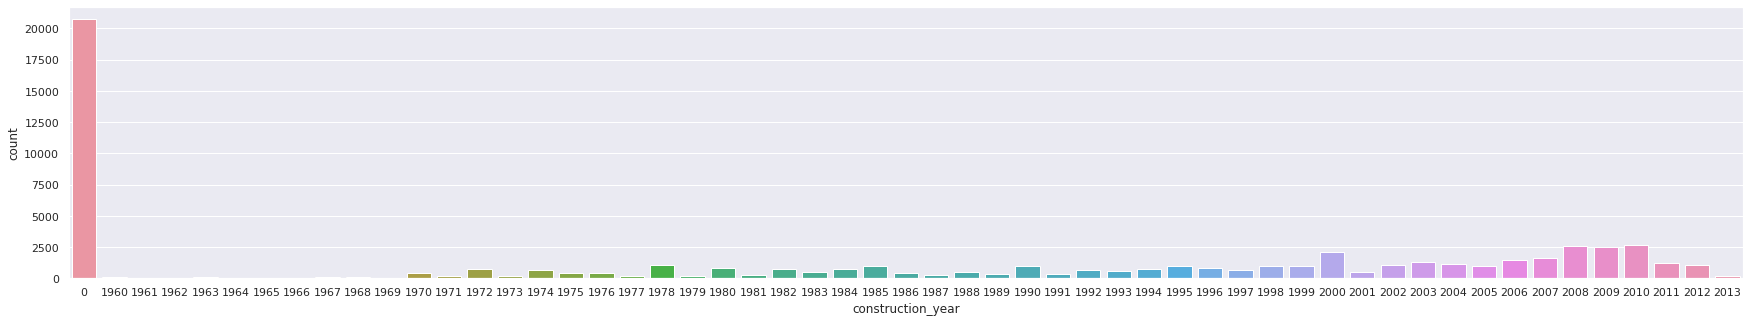

In [ ]:
sb.countplot(x = 'construction_year', data = TrainingSetValues_df)
plt.show()

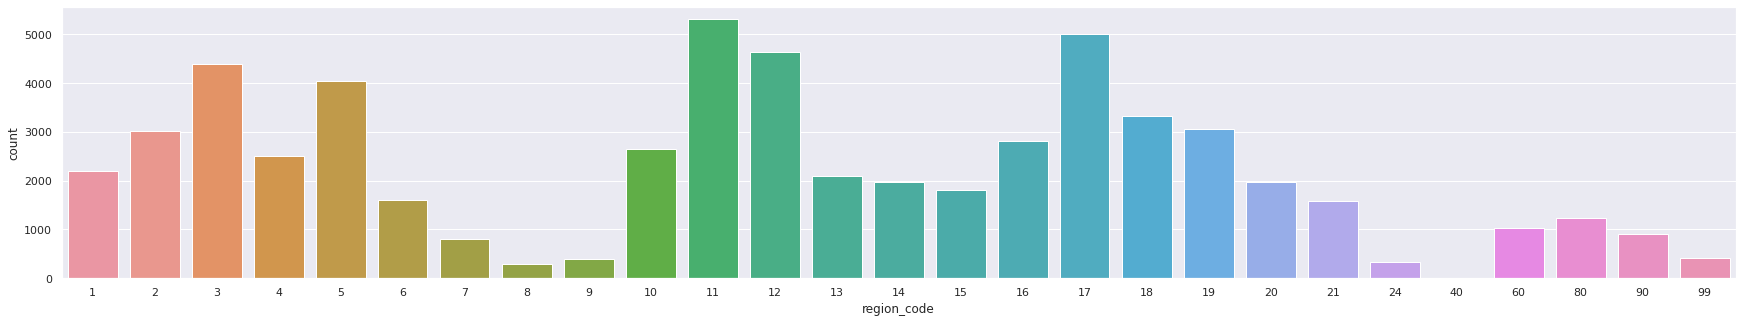

In [ ]:
sb.countplot(x = 'region_code', data = TrainingSetValues_df)
plt.show()

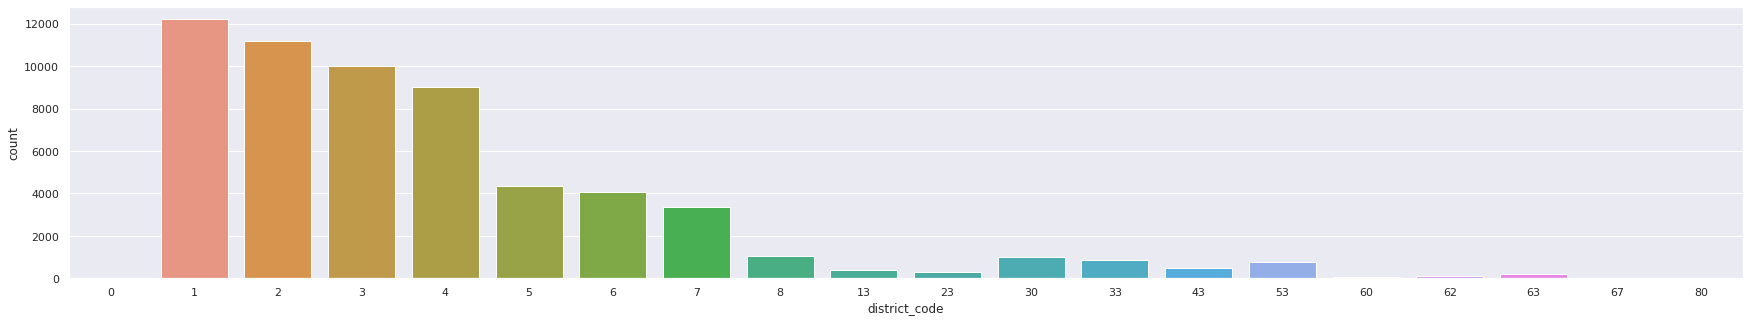

In [ ]:
sb.countplot(x = 'district_code', data = TrainingSetValues_df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


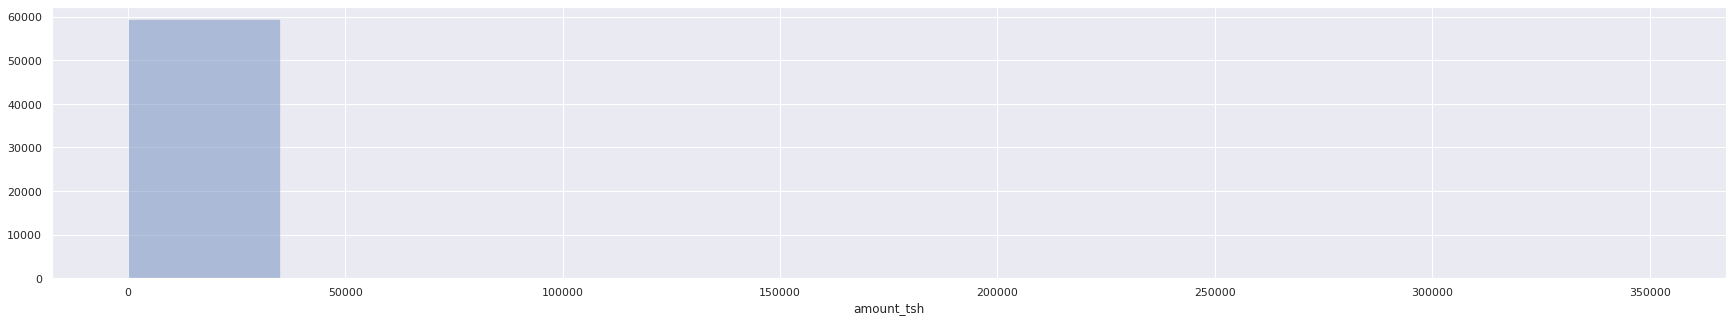

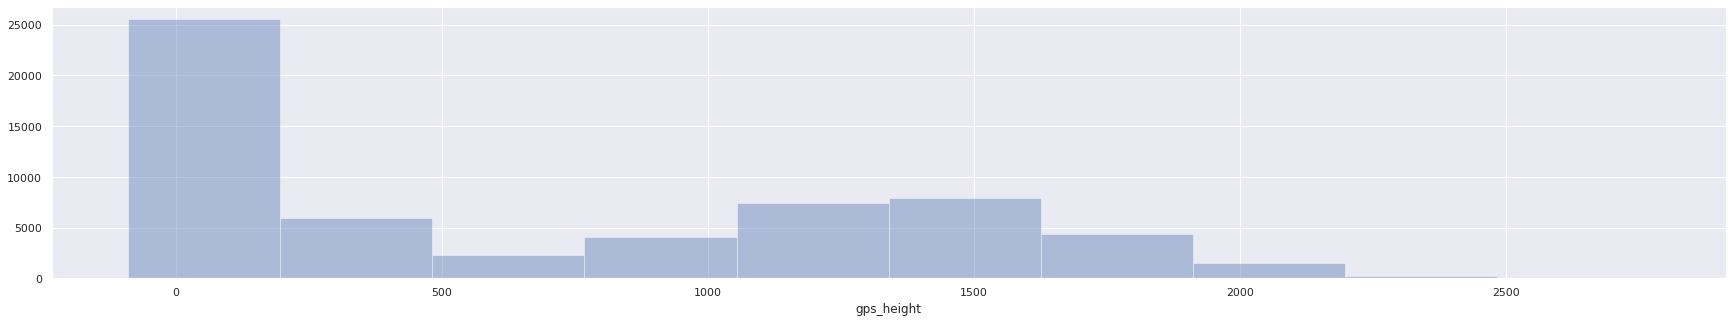

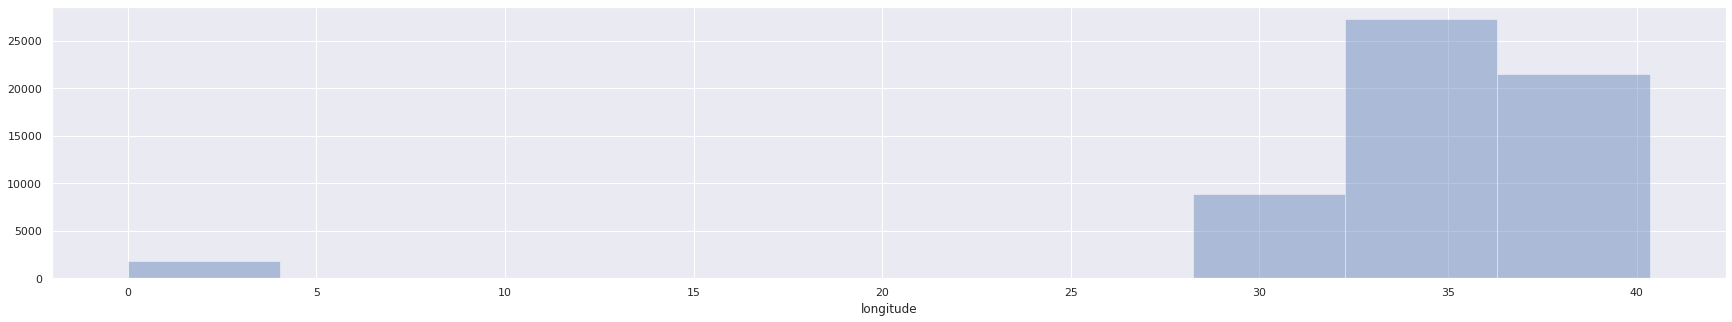

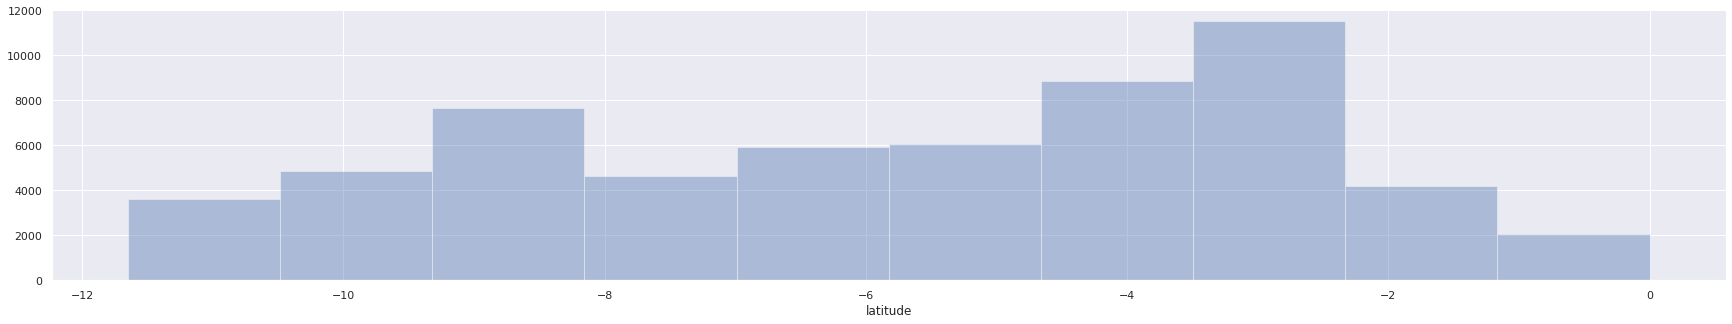

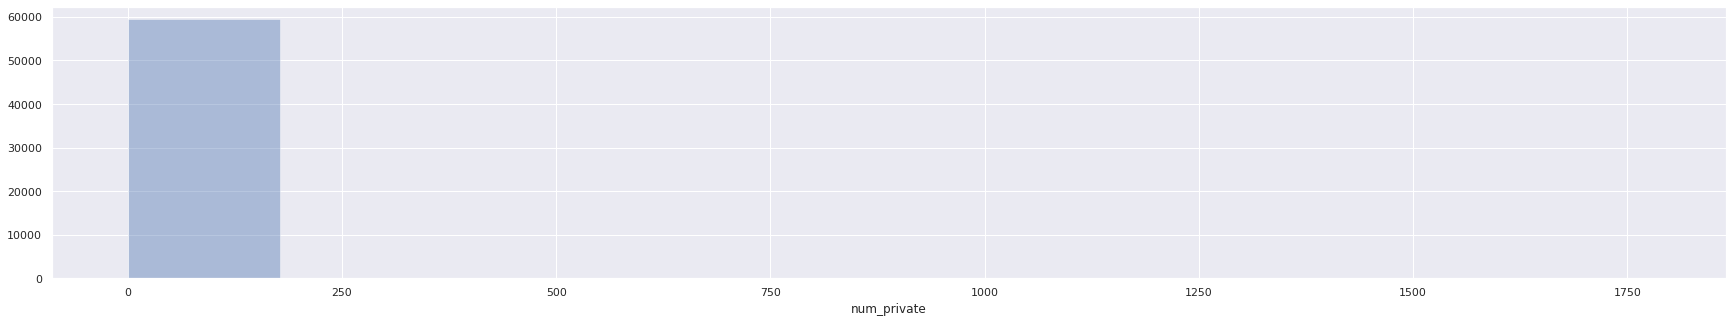

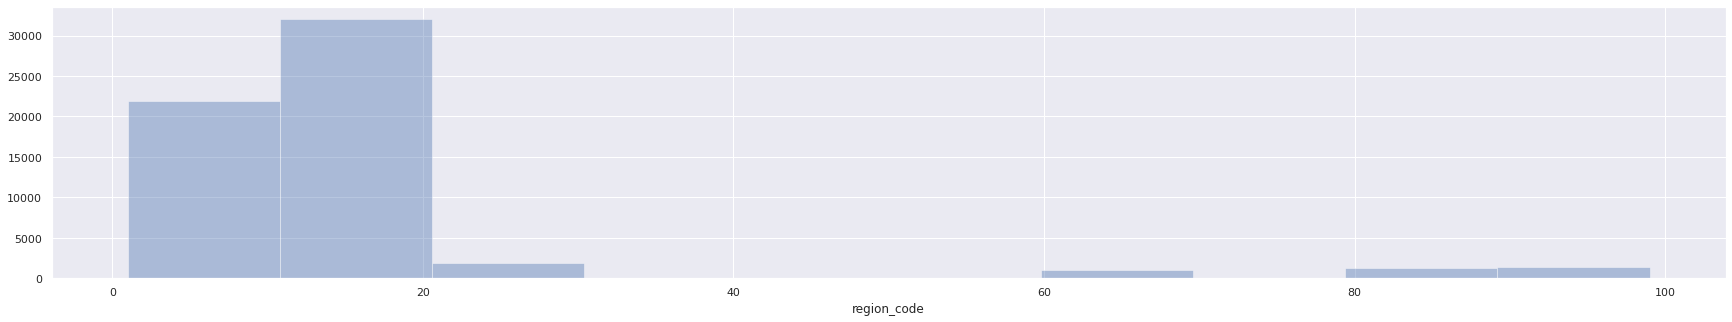

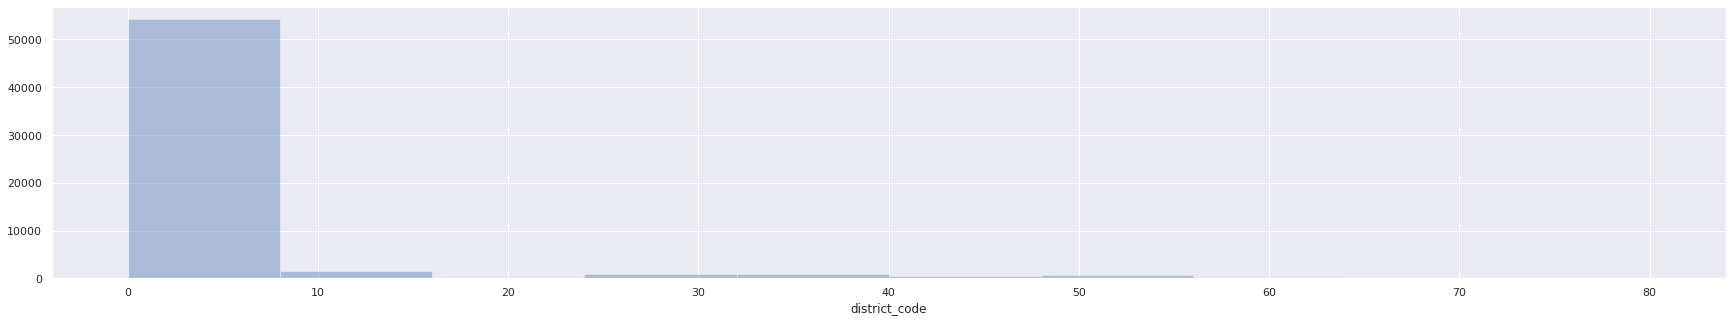

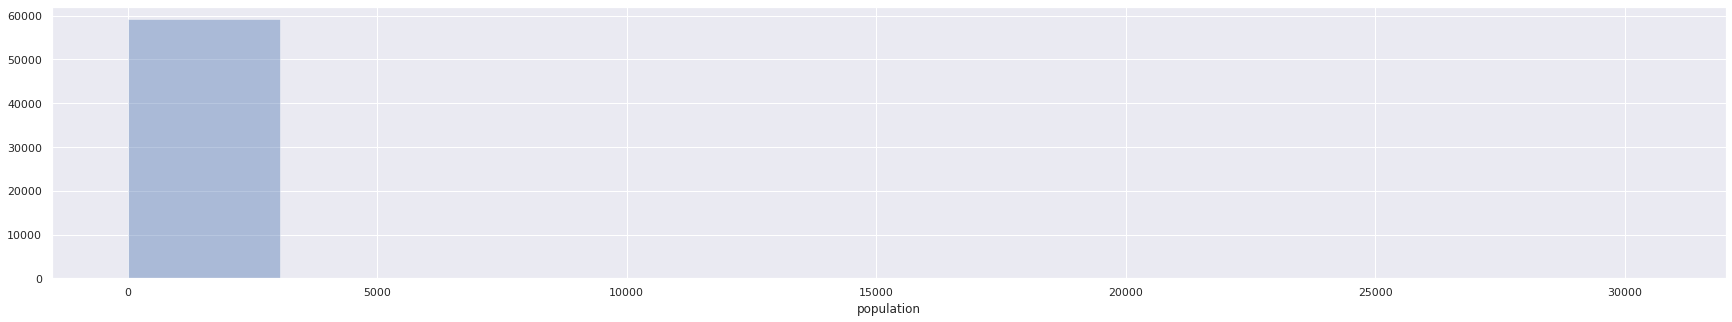

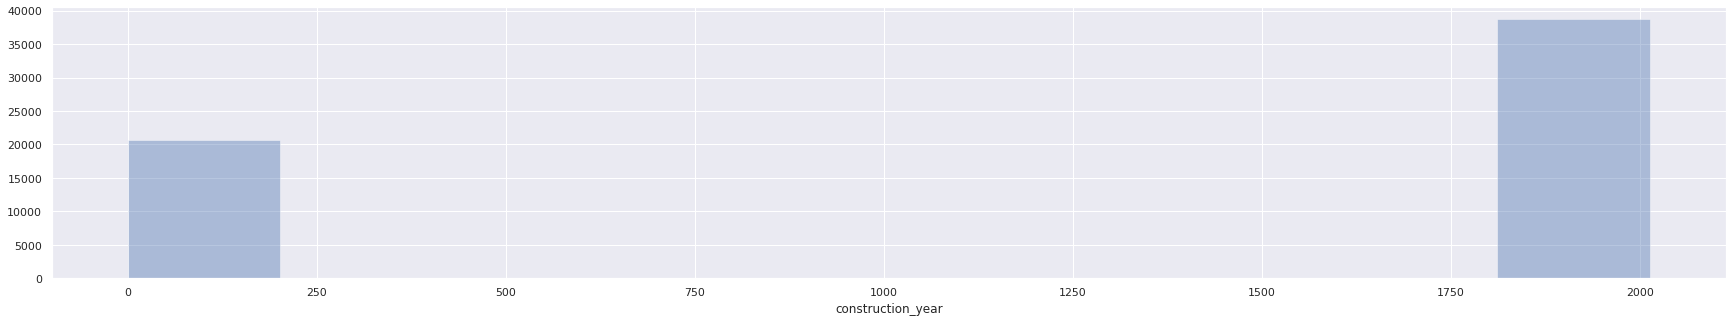

In [ ]:
for col in num_cols:
  sb.distplot(TrainingSetValues_df[col],kde = False, bins = 10)
  plt.show()

# Categorical features

In [6]:
#find categorical columns
cat_cols = train_test.columns[train_test.dtypes == "object"].tolist()
print(cat_cols)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


### It's better to identify nominal and ordinal categorical columns for future encoding part

In [ ]:
TrainingSetValues_df[cat_cols].head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Visualizations

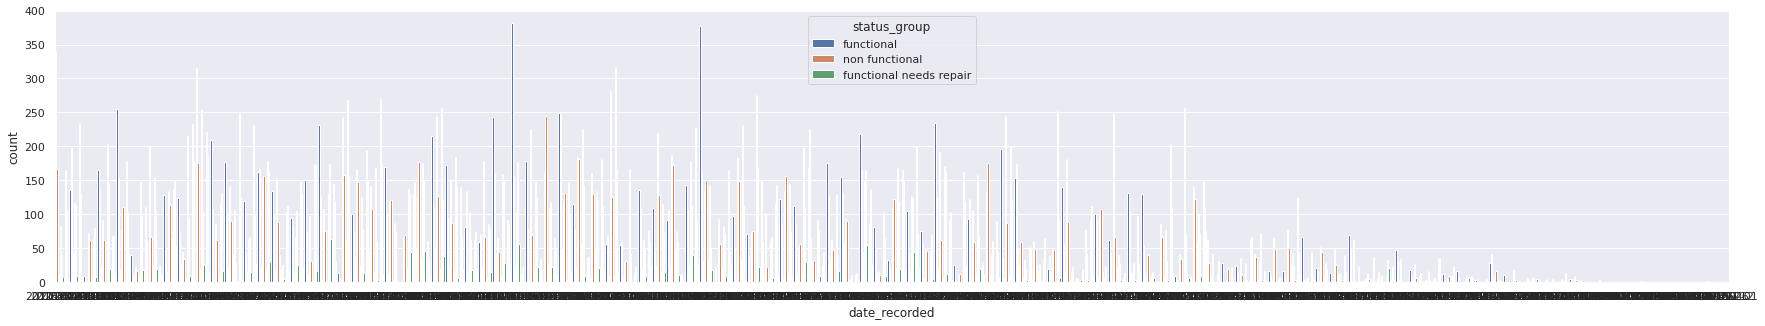

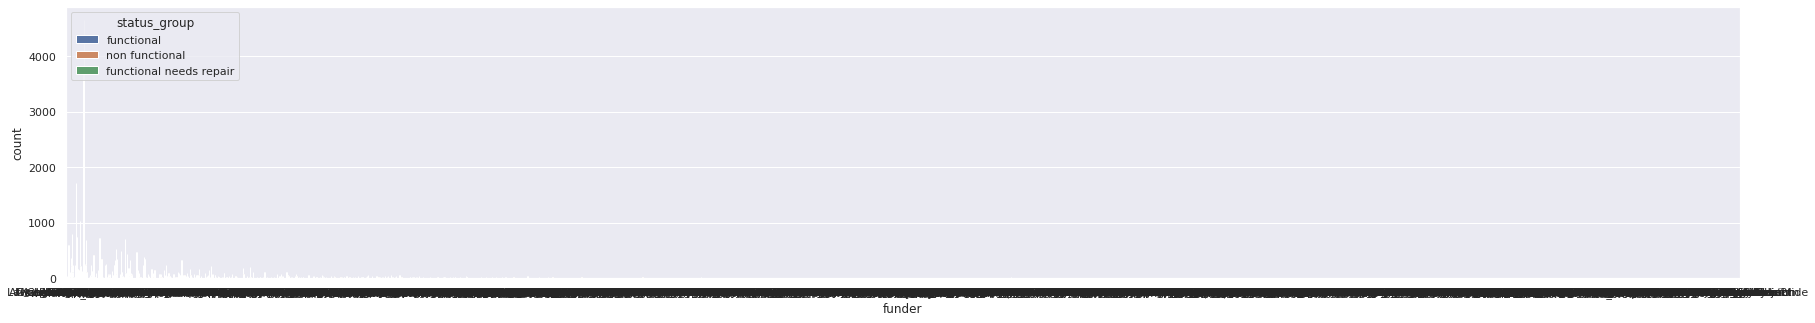

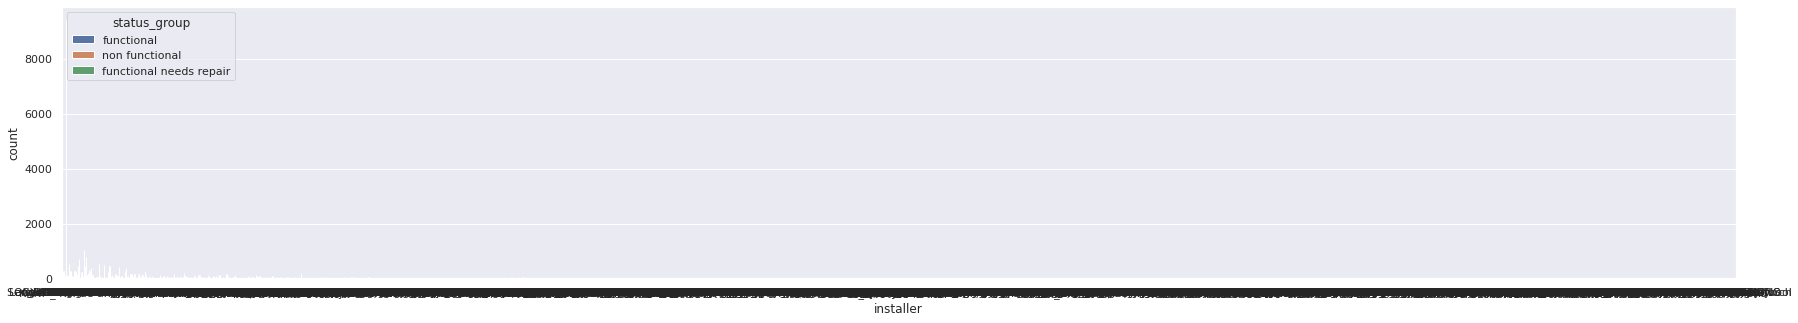

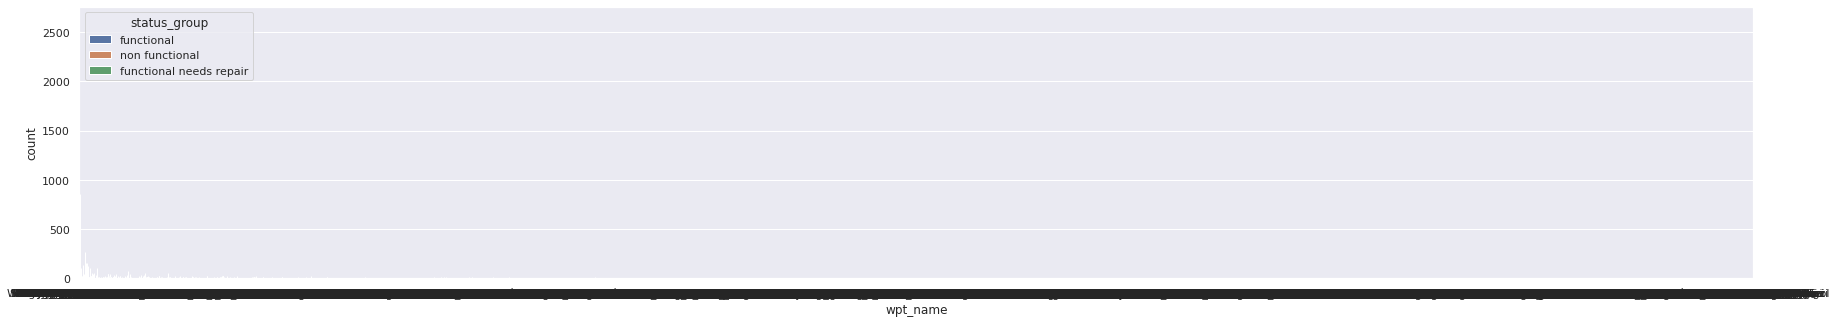

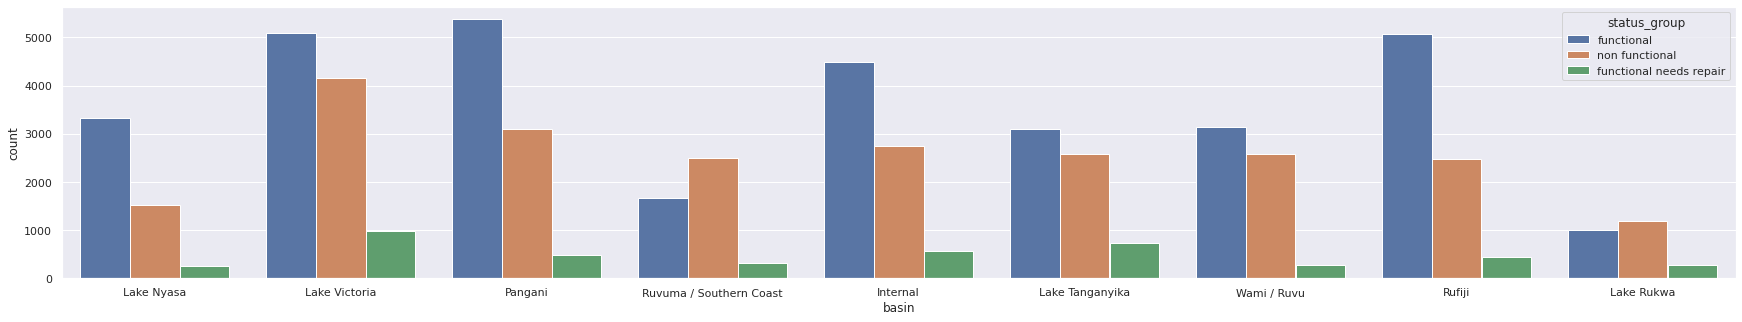

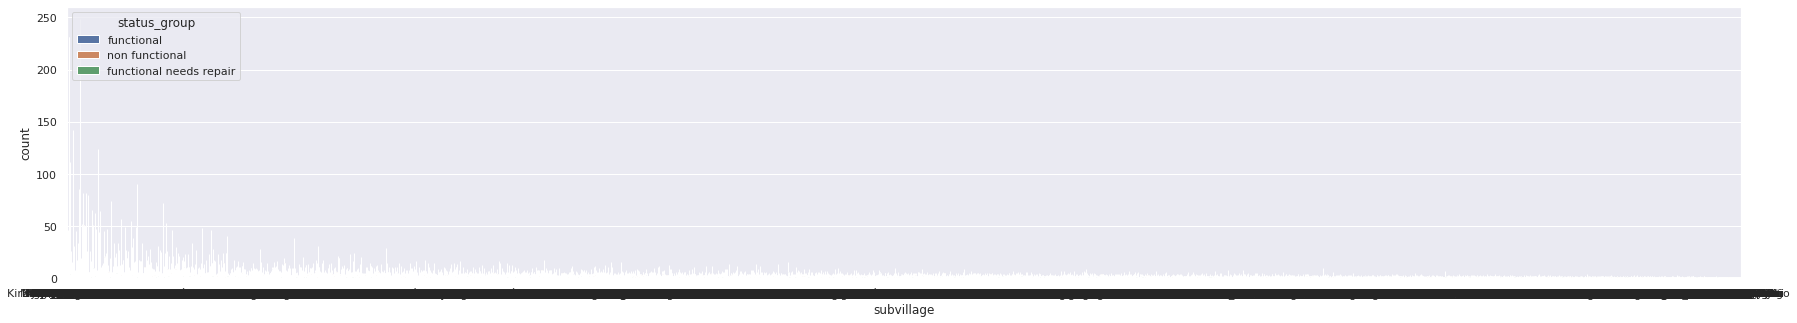

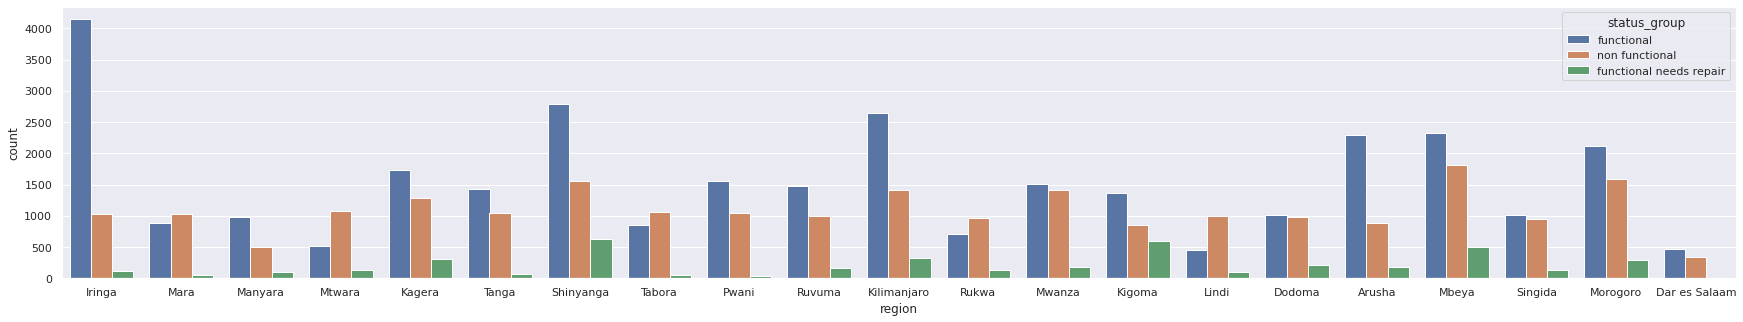

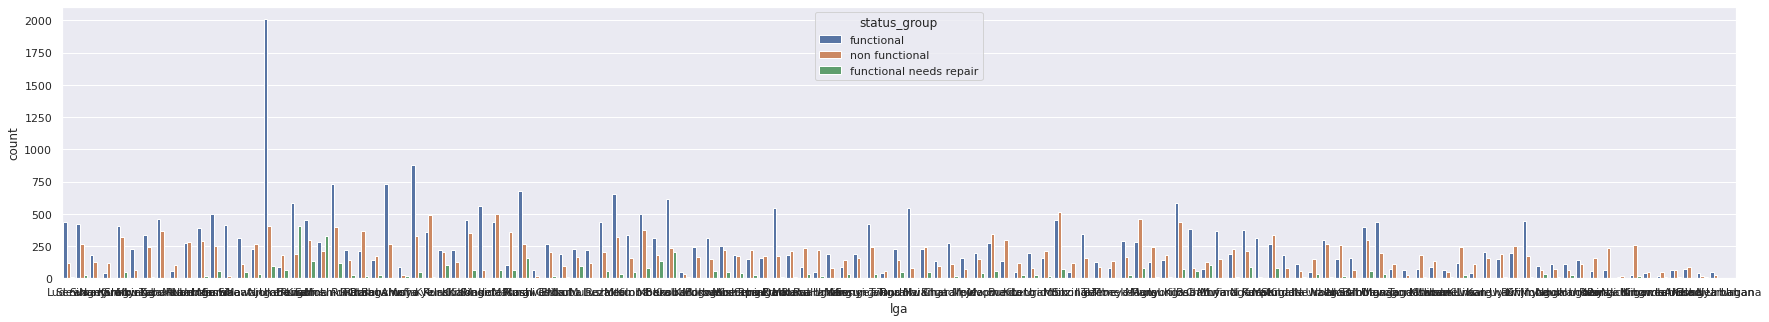

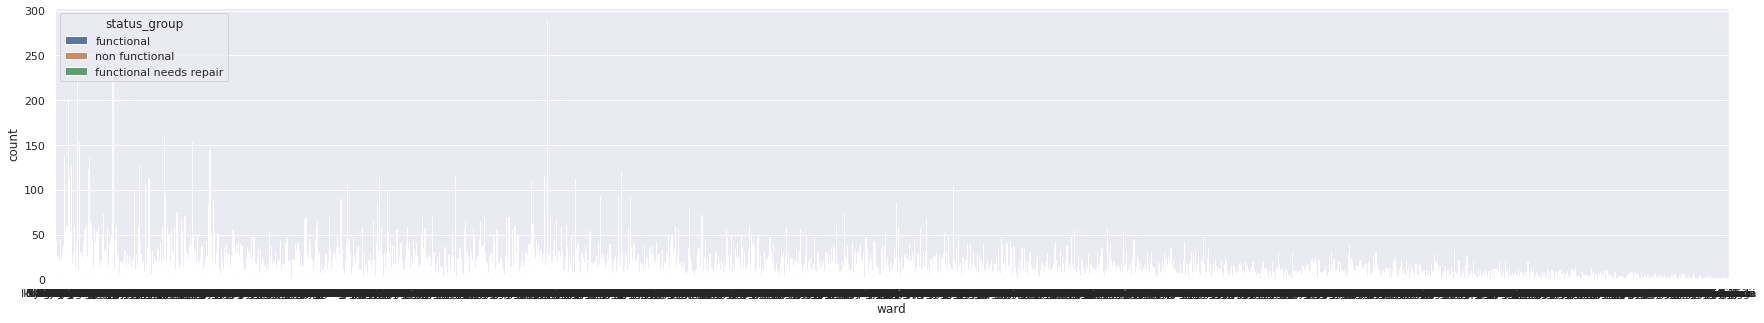

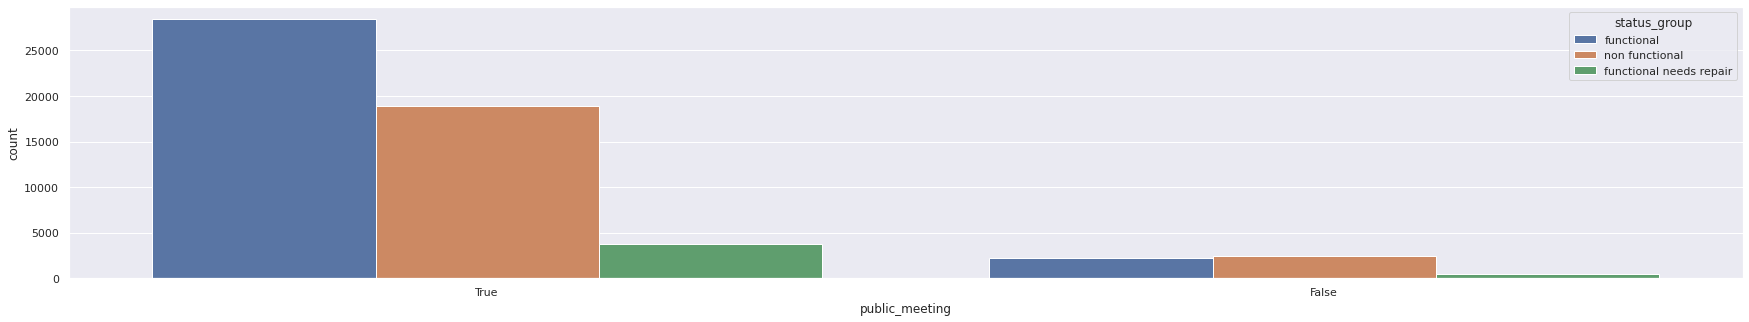

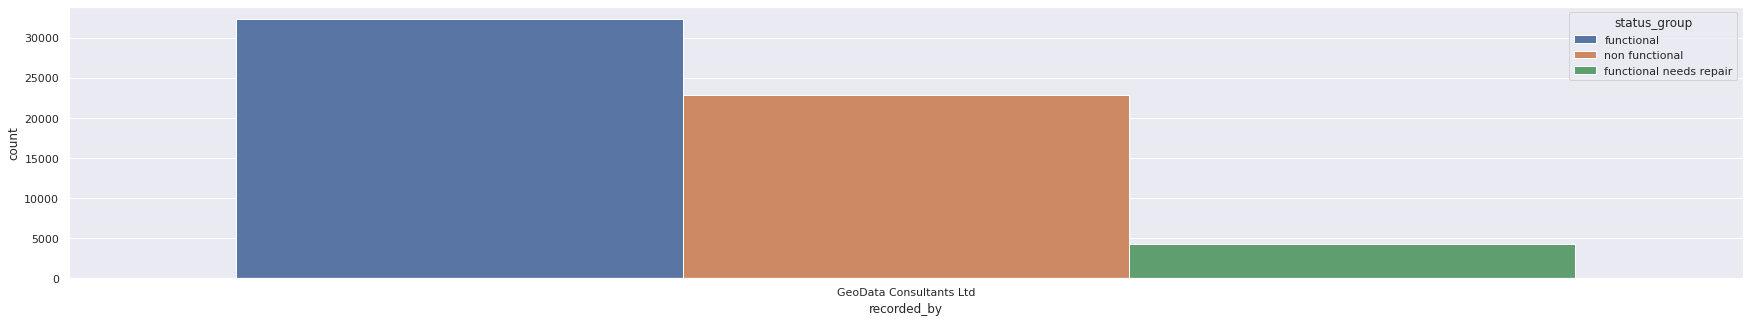

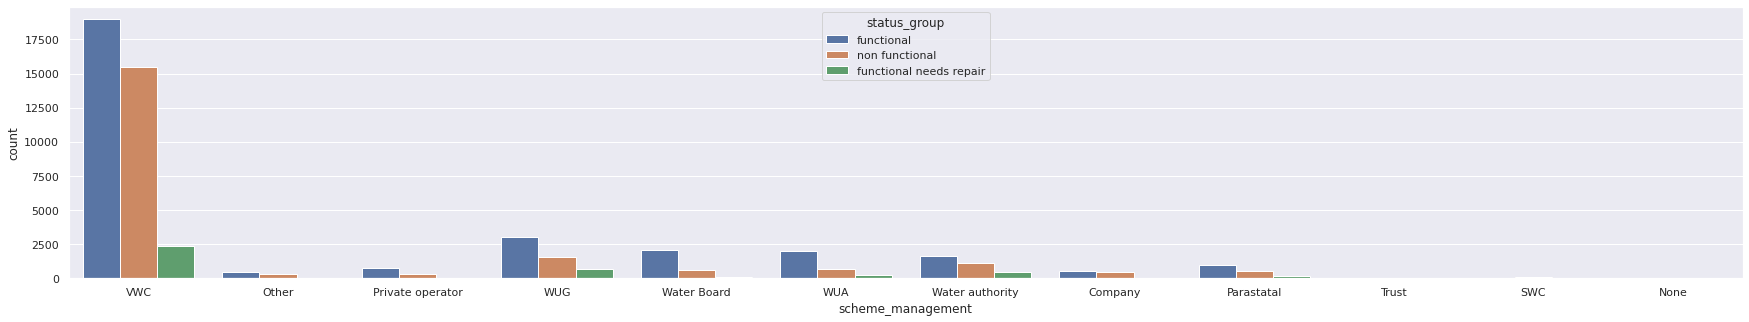

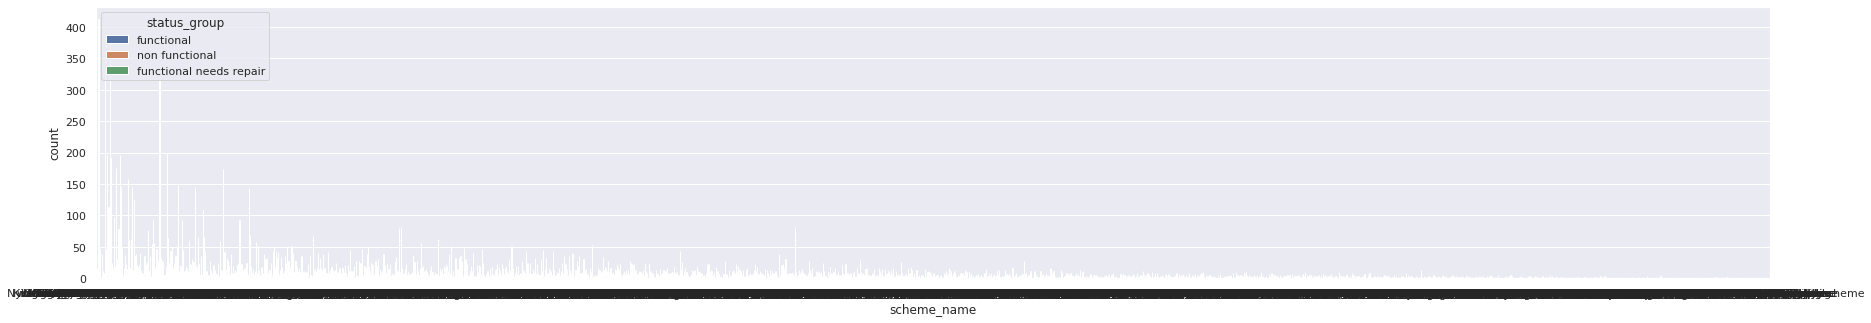

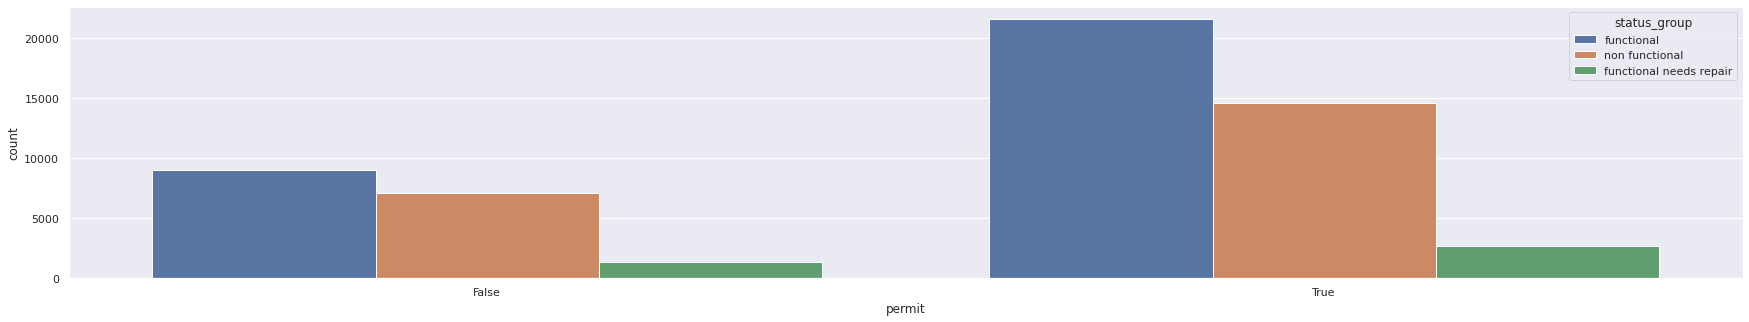

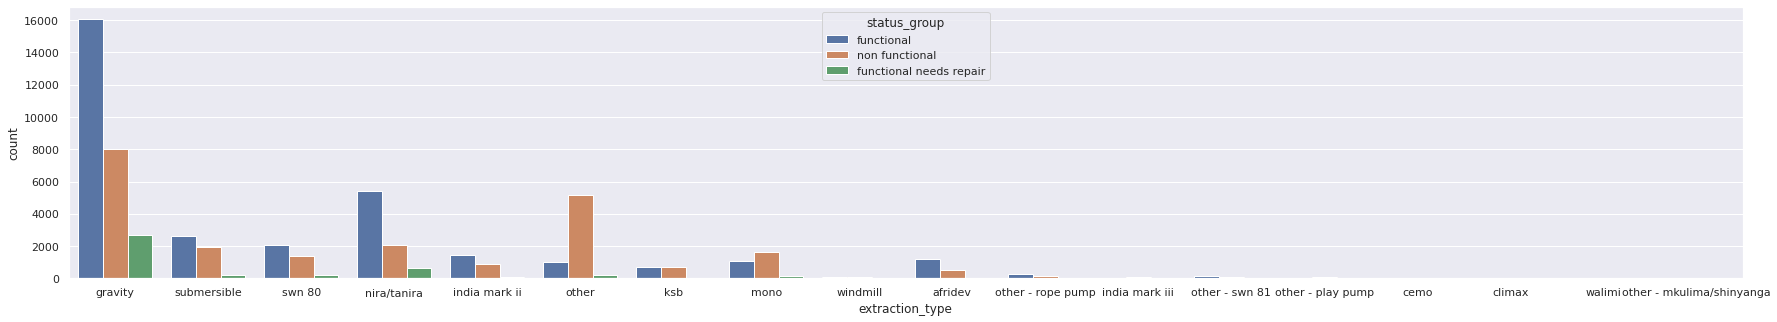

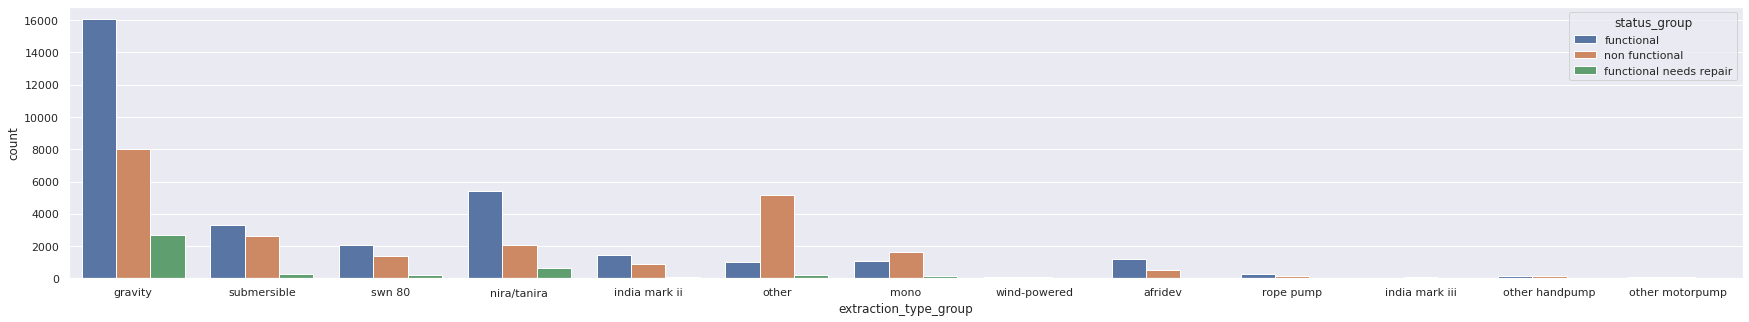

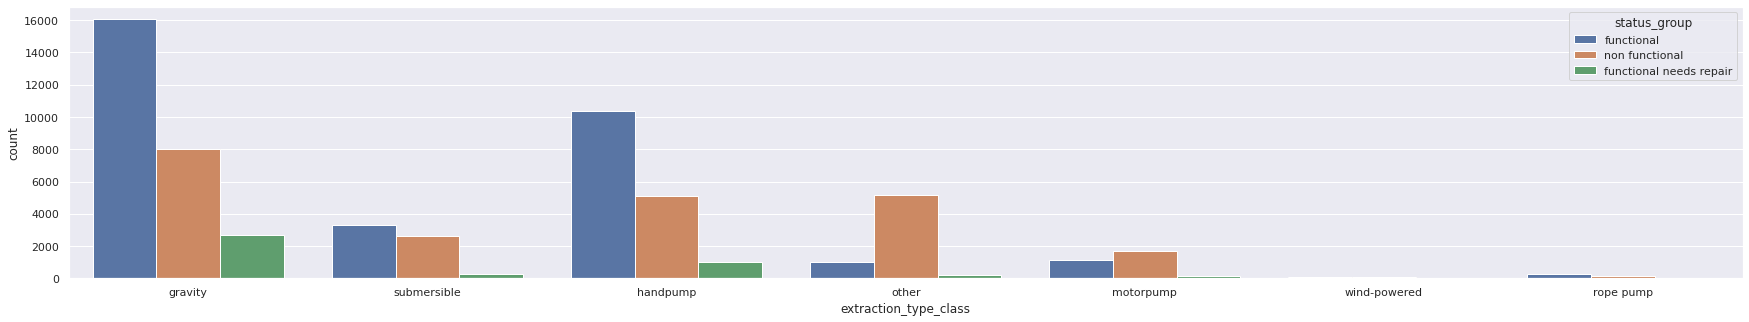

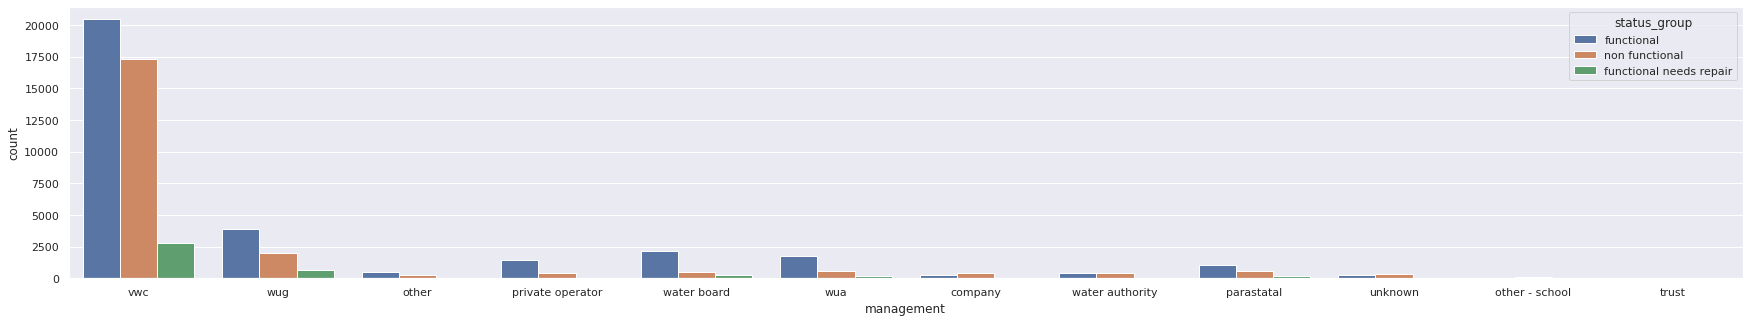

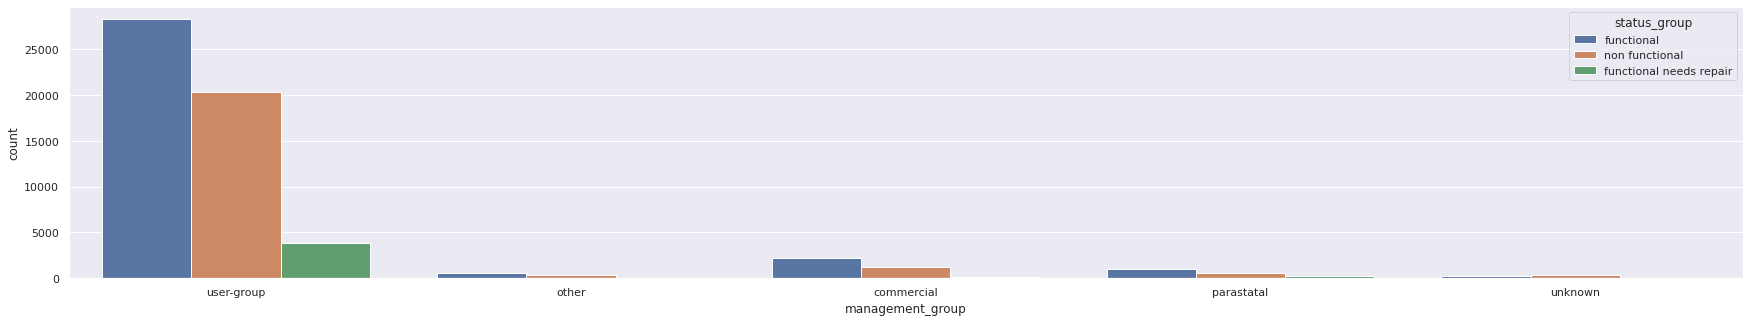

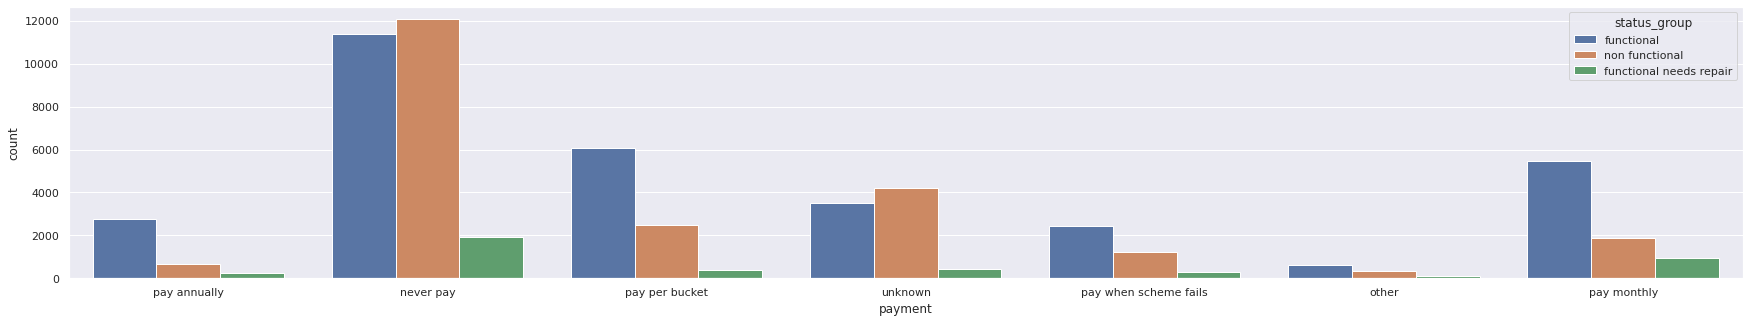

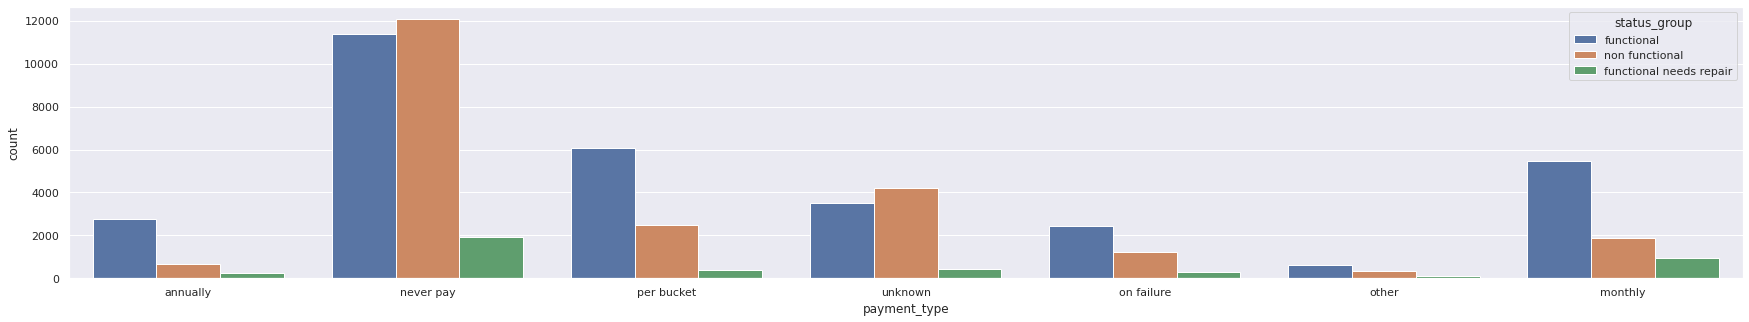

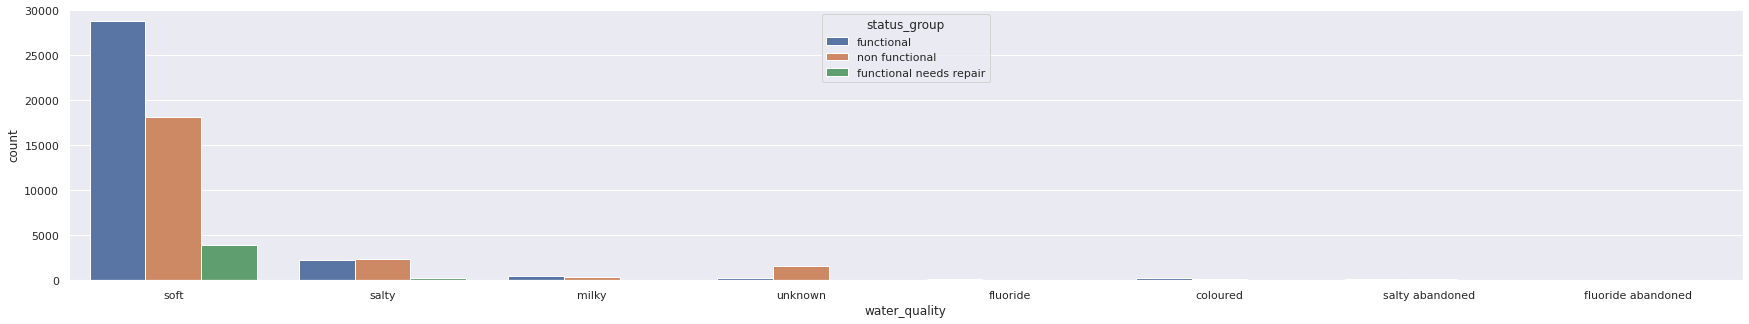

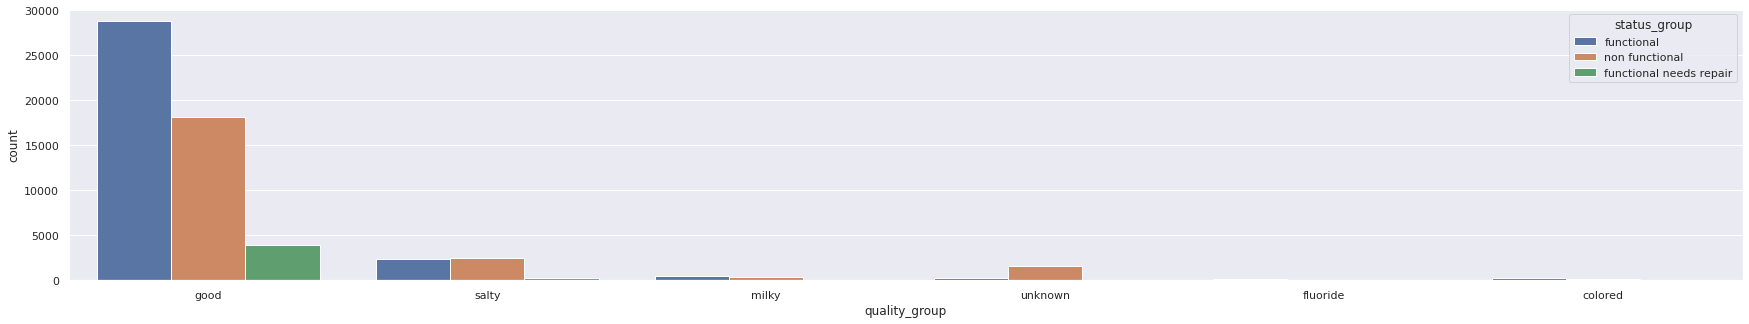

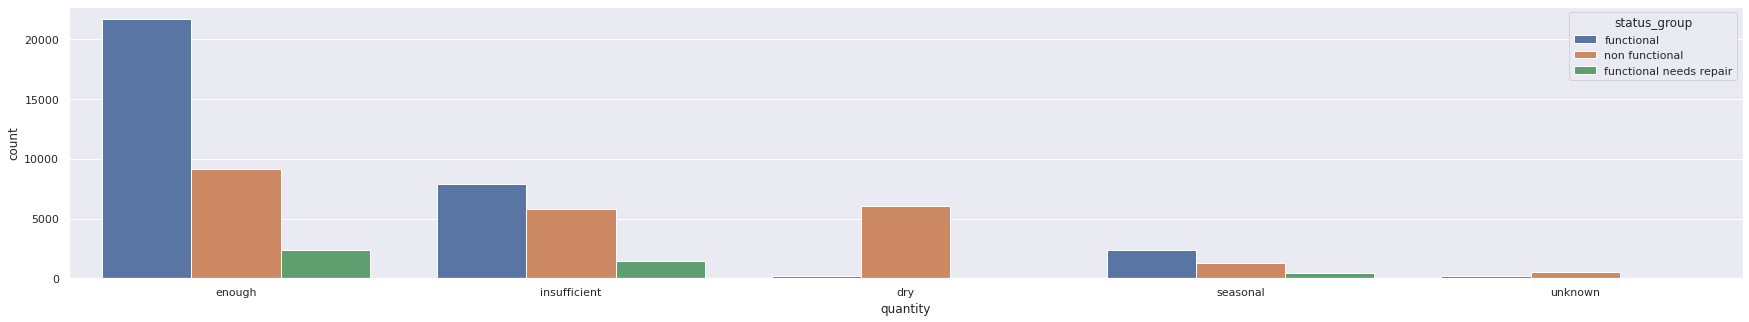

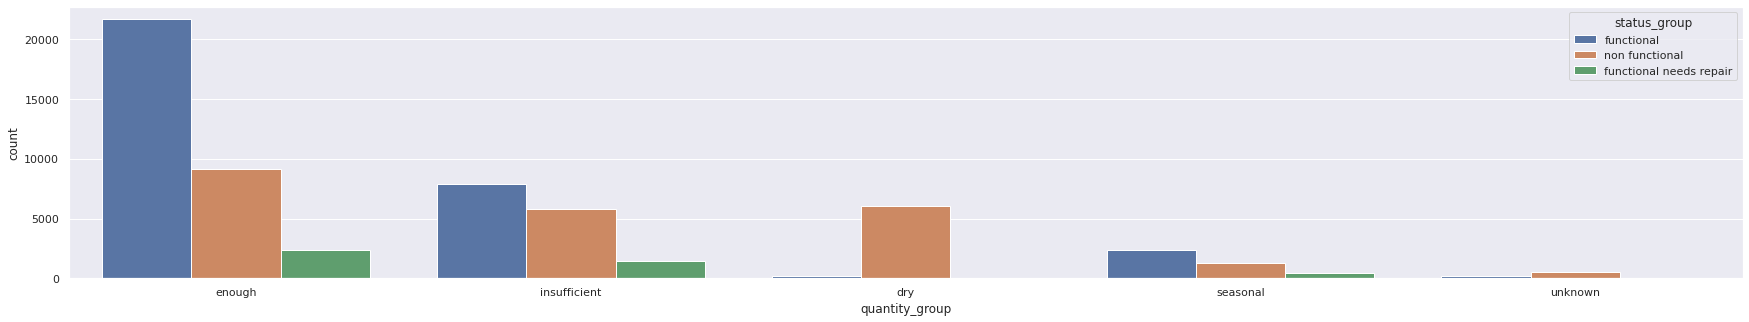

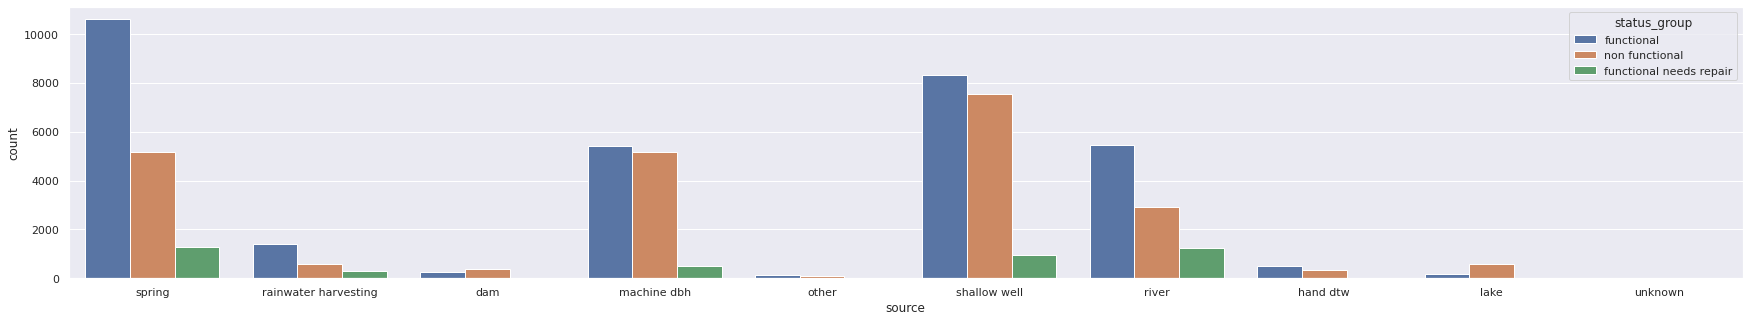

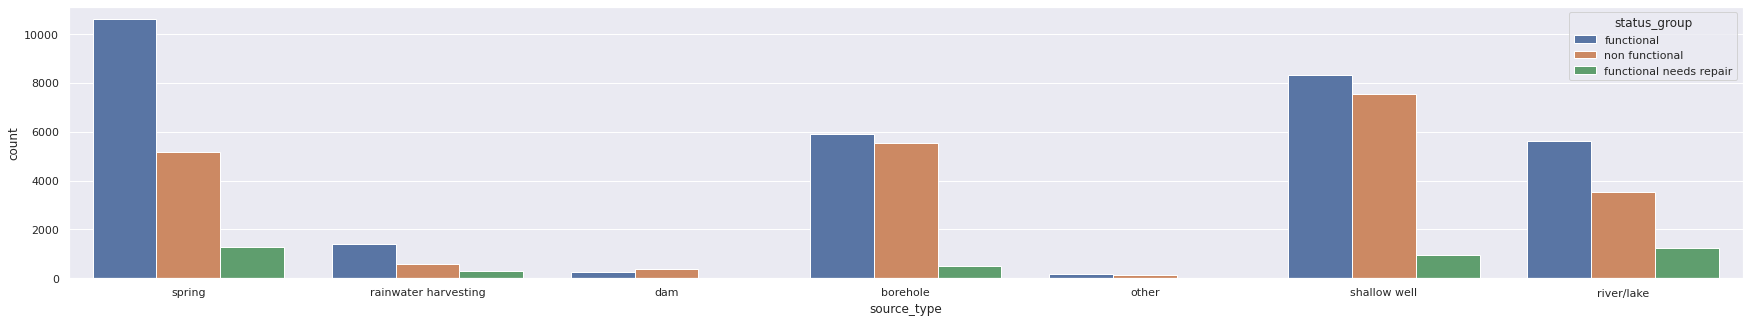

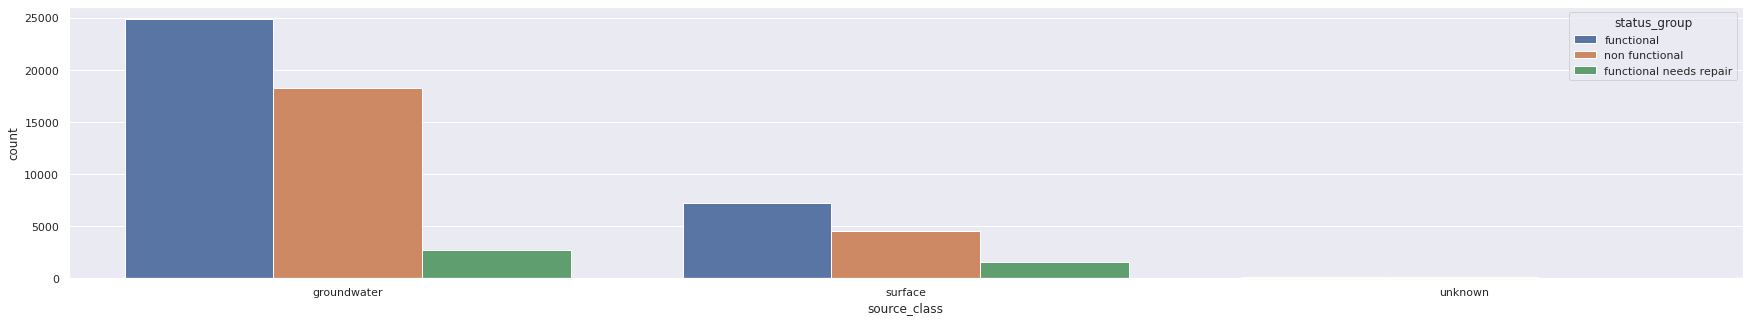

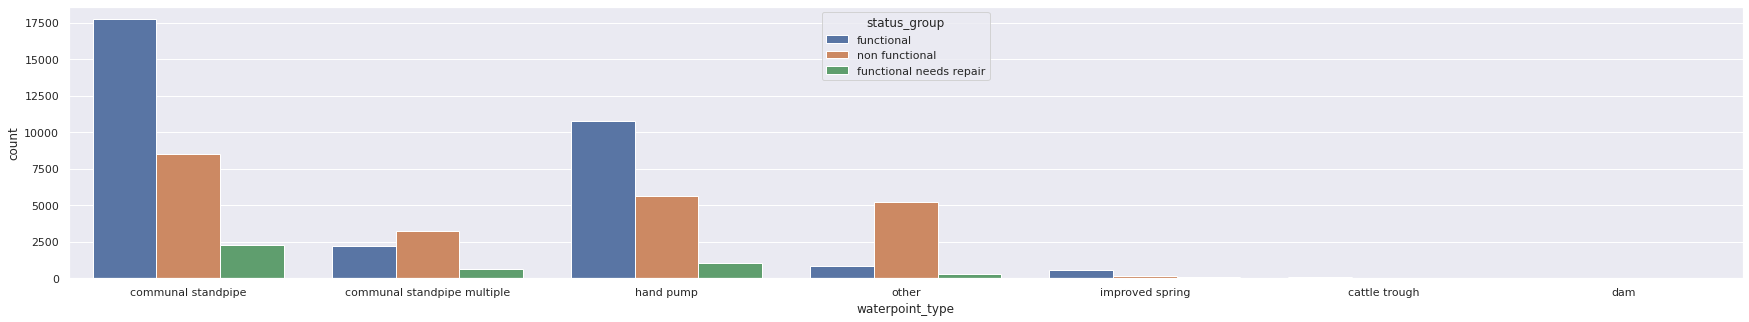

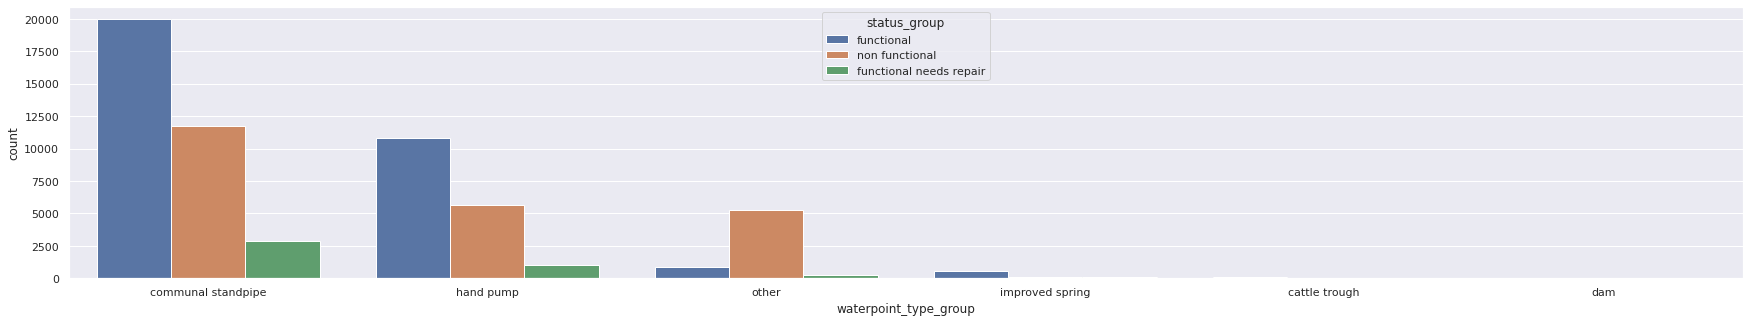

In [ ]:
#plot count plots for categorical columns
sb.set(rc={'figure.figsize':(30.0,5.0)})
for col in cat_cols:
  sb.countplot(x = col, hue = 'status_group', data = joined_df)
  plt.show()

### Outlier Analysis

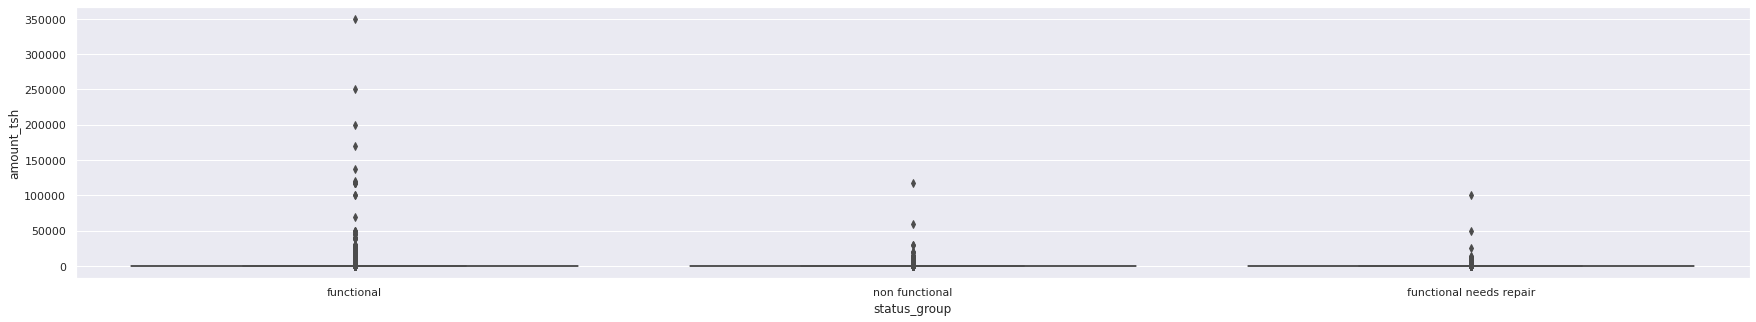

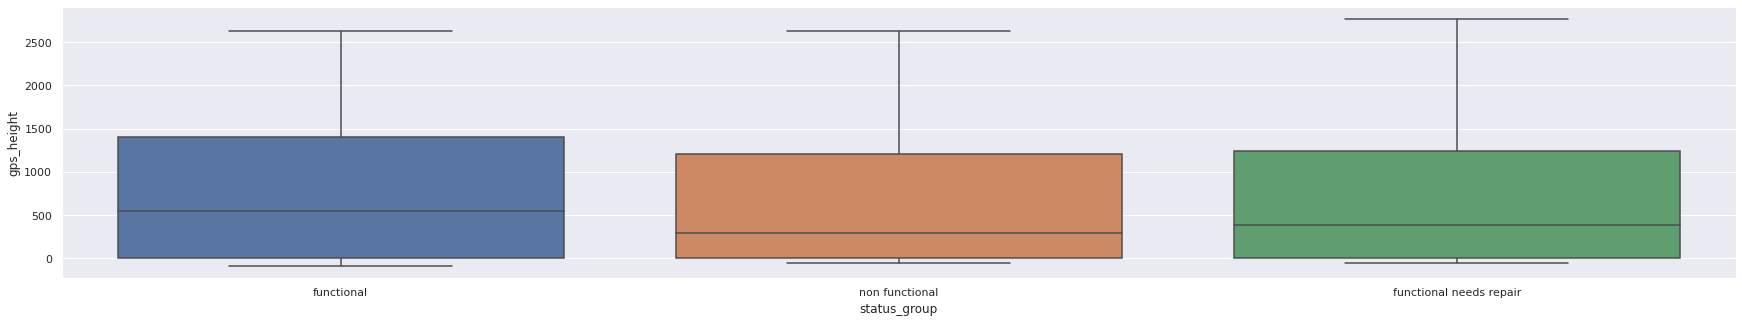

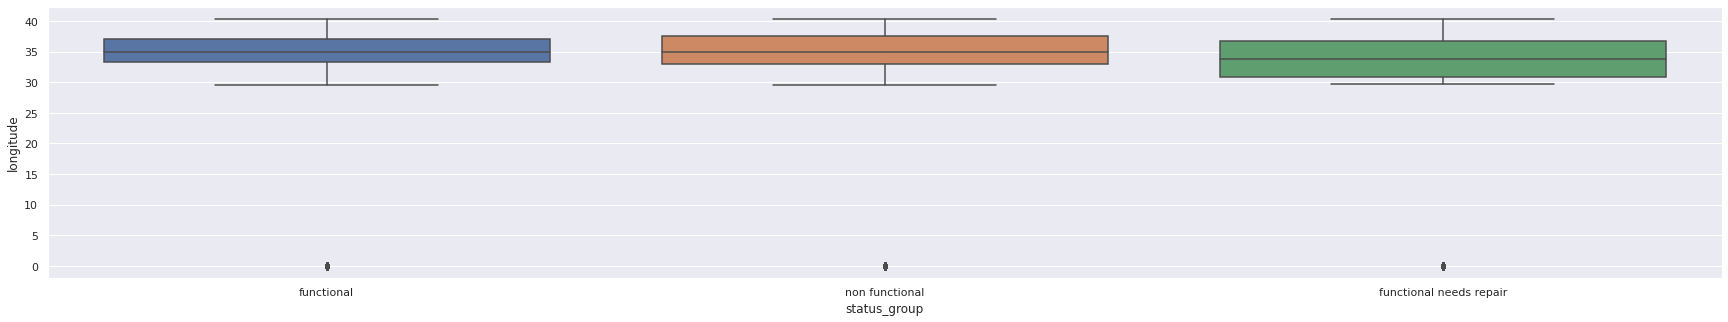

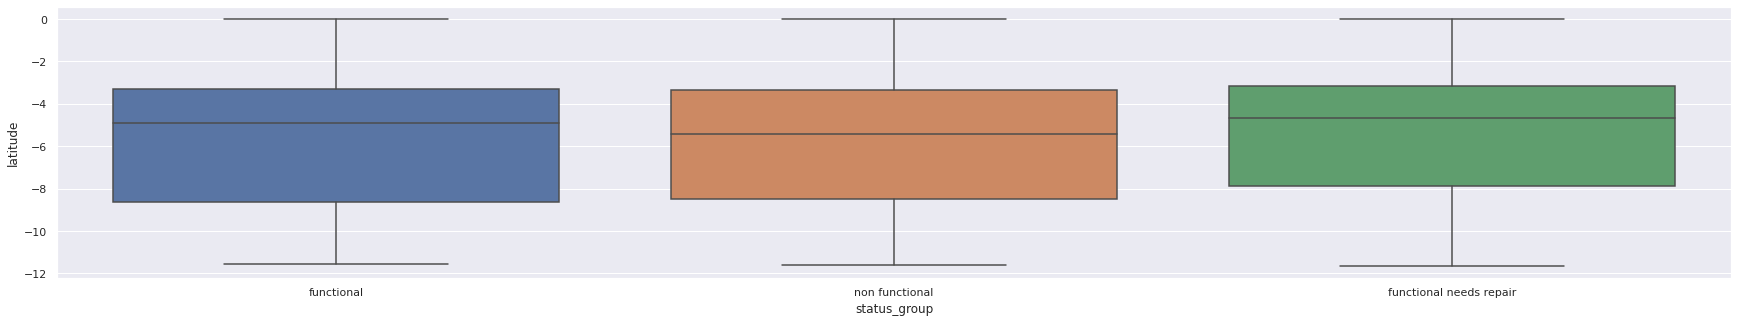

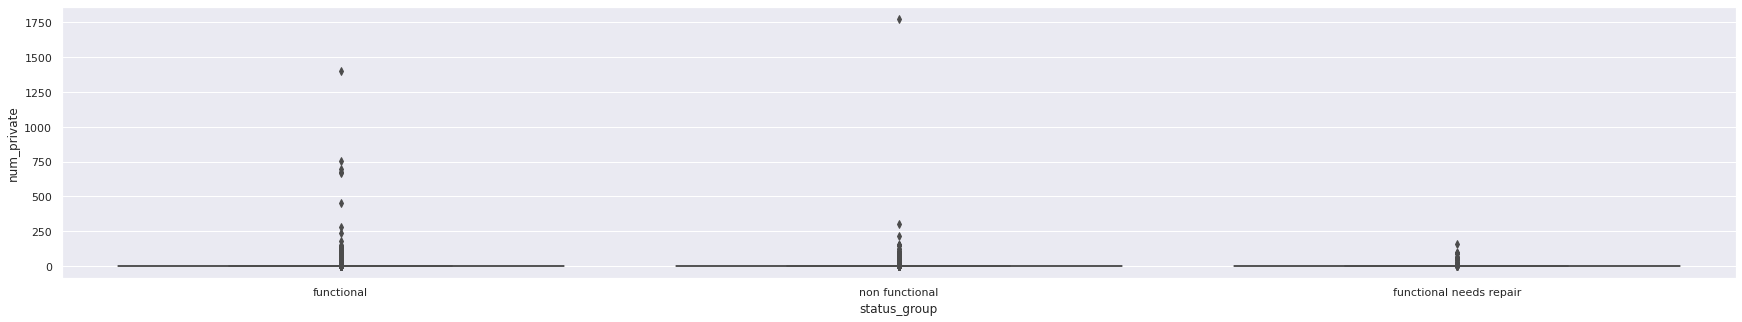

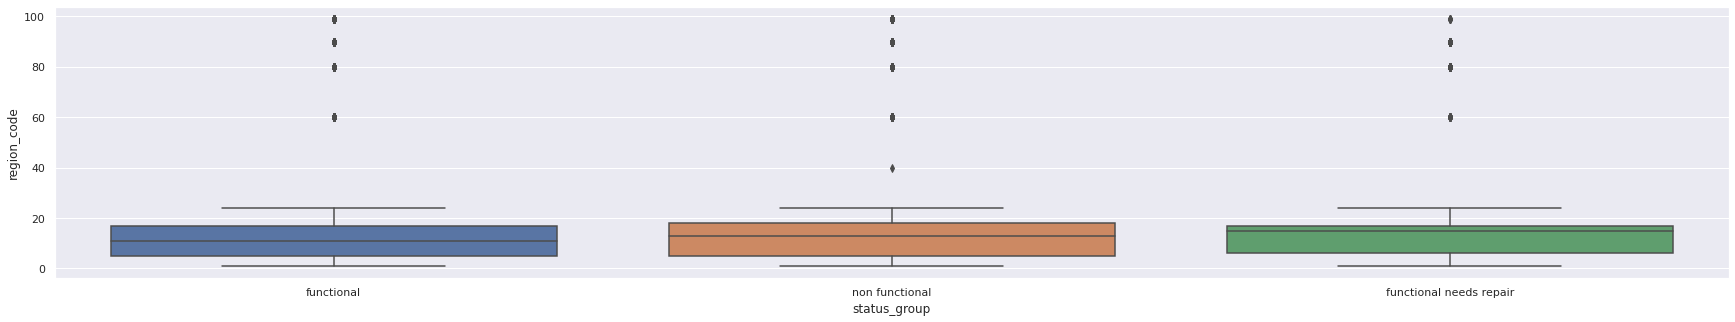

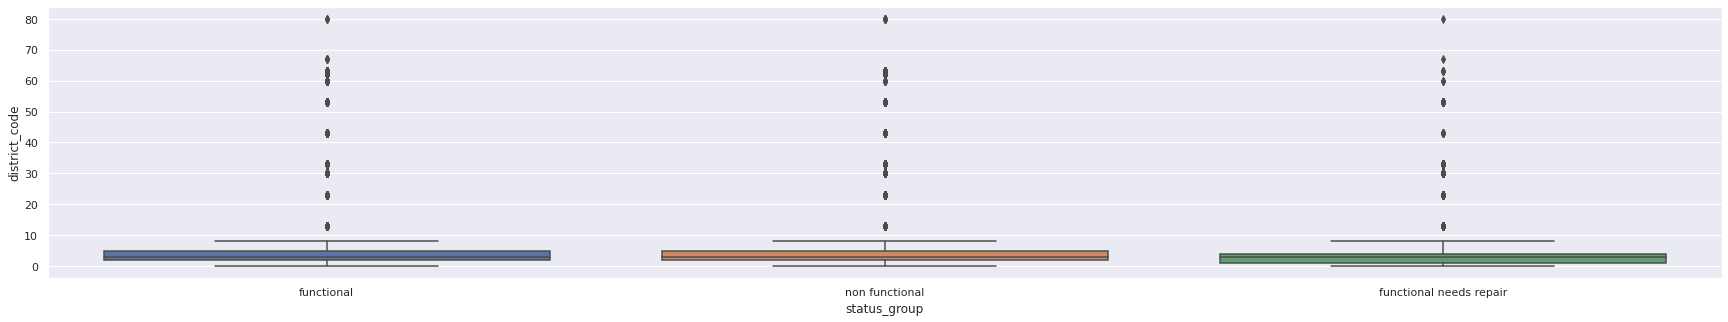

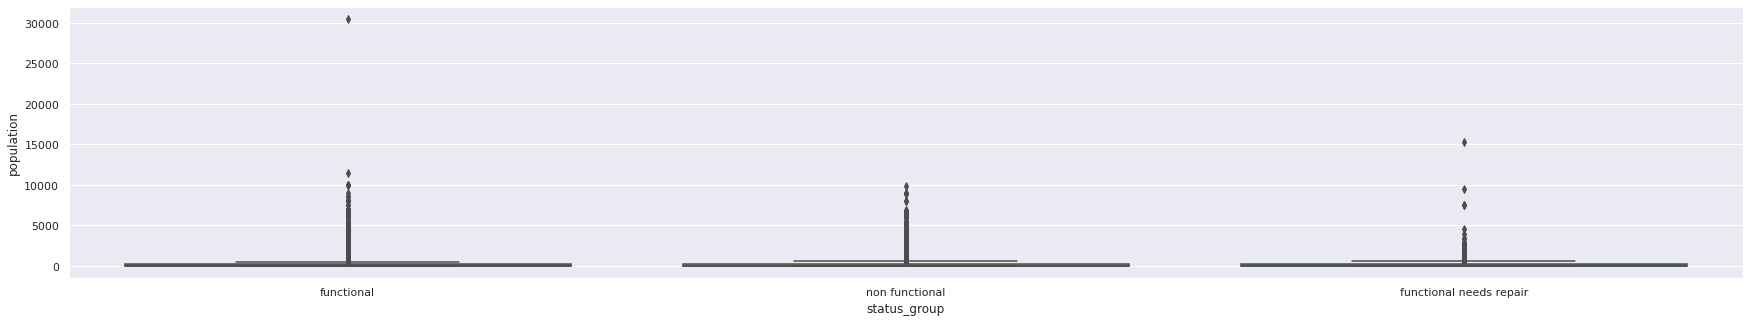

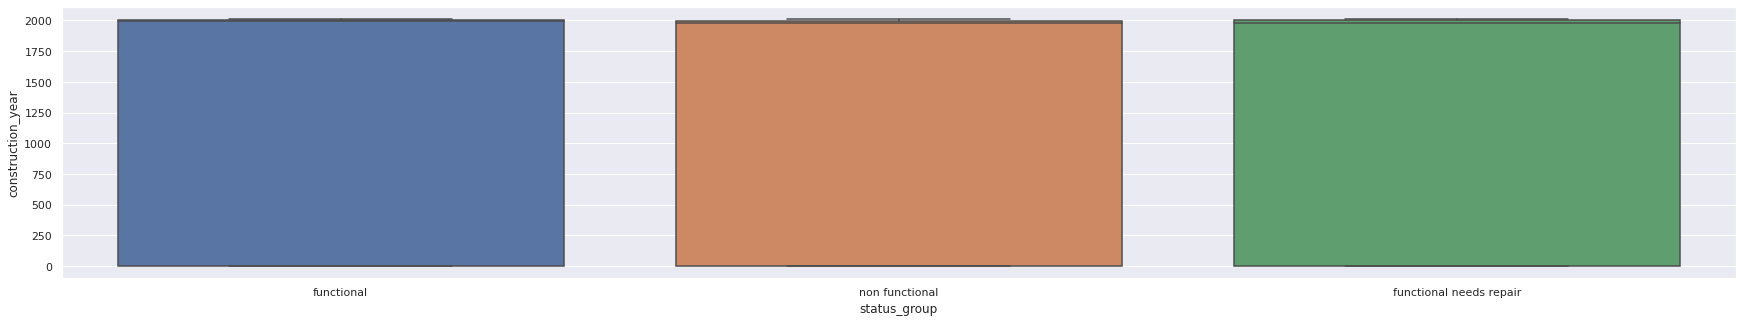

In [ ]:
for col in num_cols:
  sb.boxplot(x="status_group", y=col, data=joined_df)
  plt.show()

### **Decisions after exploring the data manually**
*   'wpt_name' and 'subvillage' will not be used since categorical cardinality is high.

**Duplicate features**
* 'management' and 'scheme_management'
* 'payment' and 'payment_type'
* 'extraction_type', 'extraction_type_group', 'extraction_type_class'
*   'region' and 'region_code'
*   'source' and 'source_type'
*   'waterpoint_type' and 'waterpoint_type_group'
*   'quantity' and 'quantity_group'







# Identify and Handle missing NaN values

### Missing values in numerical columns

In [ ]:
train_test[num_cols].isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

Missing values in categorical columns

In [ ]:
train_test[cat_cols].isnull().sum()

date_recorded                0
funder                    4504
installer                 4532
wpt_name                     0
basin                        0
subvillage                 470
region                       0
lga                          0
ward                         0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
dtype: int64

 

*   Tanzania is Situated in 00°59' S, 11°45' S, 29°10' E, 40°29' E (longitude, latitude) therefore having zero values for longitude, latitude cannot happen here.
*   Also, there are many zero values for the construction_year attribute. It is also not possible

*   amount_tsh - Total static head (amount water available to waterpoint) cannot contain many zero values as if it is zero; there is no point in building a waterpoint
*   population - Population around the well cannot contain many zero values as if it is zero, there is no point in building a waterpoint






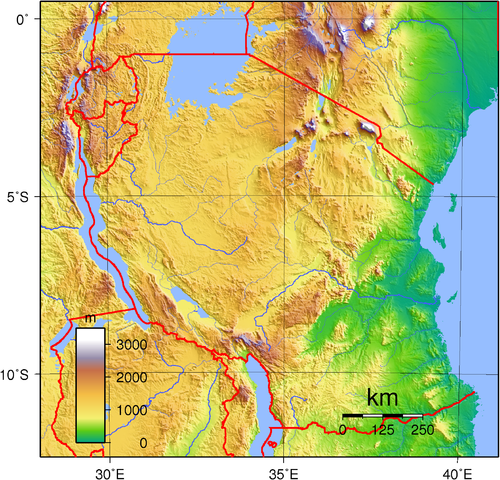

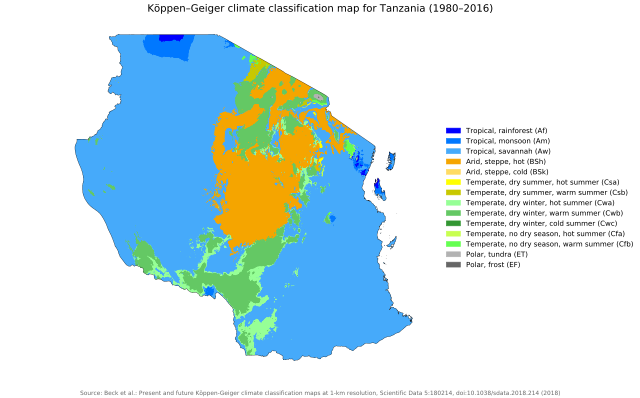



*   According to the above two maps, regions with zero altitudes are less in Tanzania and have tropical savannah climates. Therefore we can assume that zero values for the gps_height variable are not that meaningful.



Therefore I have to change those values to null values and impute those with more meaningful values with mean and median.

In [7]:
train_test['amount_tsh'].replace(0.0, np.nan, inplace=True)
train_test['population'].replace(0.0, np.nan, inplace=True)
train_test['gps_height'].replace(0.0, np.nan, inplace=True)
train_test['longitude'].replace(0.0, np.nan, inplace=True)
train_test['latitude'].replace(0.0, np.nan, inplace=True)
train_test['construction_year'].replace(0.0, np.nan, inplace=True)

In [ ]:
train_test.groupby(['region','permit']).size()

region         permit
Arusha         False      314
               True      3244
Dar es Salaam  False      980
Dodoma         False     1528
               True      1251
Iringa         False     2627
               True      3969
Kagera         False     1014
               True      3160
Kigoma         False     1467
               True      2066
Kilimanjaro    False      546
               True      4778
Lindi          False      896
               True      1024
Manyara        False      101
               True      1871
Mara           False      732
               True      1248
Mbeya          False     1745
               True      2632
Morogoro       False       52
               True      4986
Mtwara         False      506
               True      1638
Mwanza         False      166
               True      3731
Pwani          False     1393
               True      1938
Rukwa          False      795
               True      1447
Ruvuma         False     1049
               Tru

In [ ]:
train_test.groupby(['district_code', 'region','construction_year']).size()

district_code  region         construction_year
1              Arusha         1980.0                 2
                              1990.0                30
                              2000.0               159
                              2010.0                31
               Dar es Salaam  1970.0                27
                                                  ... 
63             Mtwara         2008.0                29
                              2009.0                15
                              2010.0                20
                              2011.0                 5
                              2012.0                13
Length: 2347, dtype: int64

In [8]:
train_test["gps_height"].fillna(train_test.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
train_test["gps_height"].fillna(train_test.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
train_test["gps_height"].fillna(train_test["gps_height"].mean(), inplace=True)
train_test["population"].fillna(train_test.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
train_test["population"].fillna(train_test.groupby(['region'])["population"].transform("median"), inplace=True)
train_test["population"].fillna(train_test["population"].median(), inplace=True)
train_test["amount_tsh"].fillna(train_test.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
train_test["amount_tsh"].fillna(train_test.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
train_test["amount_tsh"].fillna(train_test["amount_tsh"].median(), inplace=True)
train_test["latitude"].fillna(train_test.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
train_test["longitude"].fillna(train_test.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
train_test["longitude"].fillna(train_test.groupby(['region'])["longitude"].transform("mean"), inplace=True)
train_test["construction_year"].fillna(train_test.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test.groupby(['region'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test["construction_year"].median(), inplace=True)

Create new feature construction_to_recorded using date_recorded and construction_year

In [9]:
train_test['date_recorded'] = pd.to_datetime(train_test['date_recorded'])
train_test['construction_to_recorded'] = train_test.date_recorded.dt.year - train_test.construction_year

Min Max Scalling can be used here as data is not normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


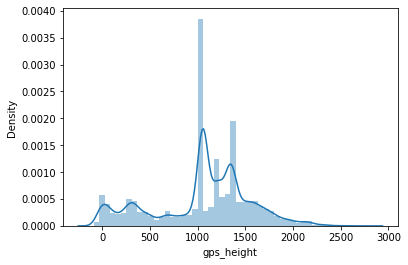

In [ ]:
sns.distplot(train_test['gps_height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


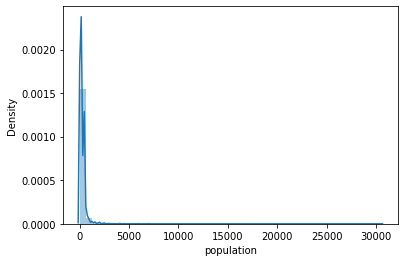

In [ ]:
sns.distplot(train_test['population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


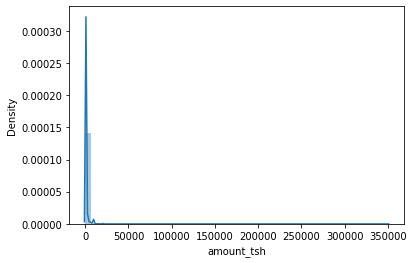

In [ ]:
sns.distplot(train_test['amount_tsh'])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,20))
a= ['gps_height','population','amount_tsh']
train_test[a] = scaler.fit_transform(train_test[a])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


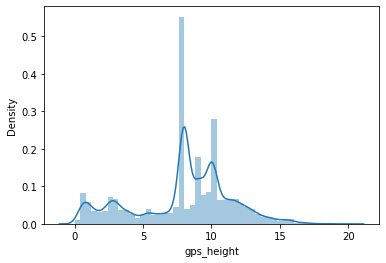

In [ ]:
sns.distplot(train_test['gps_height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


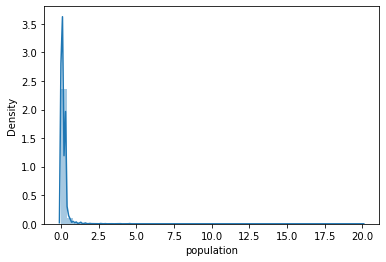

In [ ]:
sns.distplot(train_test['population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


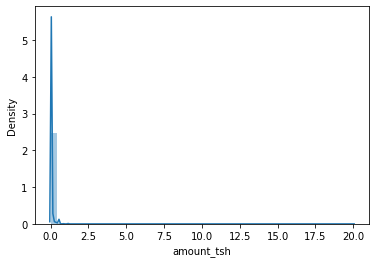

In [ ]:
sns.distplot(train_test['amount_tsh'])

### Imputaion

In [11]:
#mode imputation
train_test[cat_cols] = train_test[cat_cols].fillna(train_test[cat_cols].mode().iloc[0])

In [12]:
#convert all the categorical variables to lowercase
train_test.region = train_test.region.str.lower()
train_test.source = train_test.source.str.lower()
train_test.quantity = train_test.quantity.str.lower()
train_test.water_quality = train_test.water_quality.str.lower()
train_test.funder = train_test.funder.str.lower()
train_test.basin = train_test.basin.str.lower()
train_test.payment_type = train_test.payment_type.str.lower()
train_test.extraction_type = train_test.extraction_type.str.lower()
train_test.waterpoint_type = train_test.waterpoint_type.str.lower()
train_test.lga = train_test.lga.str.lower()
train_test.management = train_test.management.str.lower()

**Selected Features for building the model**


*   amount_tsh
*   funder
*   gps_height
*   installer
*   longitude
*   latitude
*   basin
*   region
*   district_code
*   lga
*   population
*   scheme_management
*   extraction_type
*   management
*   payment_type
*   water_quality
*   quantity
*   source
*   waterpoint_type
*   construction_to_recorded

In [13]:
features = ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region', 'district_code', 'lga',
            'population', 'scheme_management', 'extraction_type', 'management', 'payment_type', 'water_quality', 'quantity', 'source',
            'waterpoint_type', 'construction_to_recorded']

Label encoding & One hot encoding

In [14]:
train_test['funder'] = pd.factorize(train_test['funder'])[0]
train_test['scheme_management'] = pd.factorize(train_test['scheme_management'])[0]
train_test['extraction_type'] = pd.factorize(train_test['extraction_type'])[0]
train_test['management'] = pd.factorize(train_test['management'])[0]
train_test['payment_type'] = pd.factorize(train_test['payment_type'])[0]
train_test['water_quality'] = pd.factorize(train_test['water_quality'])[0]
train_test['quantity'] = pd.factorize(train_test['quantity'])[0]
train_test['source'] = pd.factorize(train_test['source'])[0]
train_test['waterpoint_type'] = pd.factorize(train_test['waterpoint_type'])[0]
train_test['basin'] = pd.factorize(train_test['basin'])[0]
train_test['region'] = pd.factorize(train_test['region'])[0]
train_test['lga'] = pd.factorize(train_test['lga'])[0]
train_test['district_code'] = pd.factorize(train_test['district_code'])[0]
train_test['construction_to_recorded'] = pd.factorize(train_test['construction_to_recorded'])[0]
train_test['installer'] = pd.get_dummies(train_test['installer'])

In [15]:
# splitting dataframe by row index
train = train_test.iloc[0:59400,:]
test = train_test.iloc[59400:,:]
print(train.shape)
print(test.shape)

(59400, 40)
(14850, 40)


In [16]:
X = train[features]
y = TrainingSetLabels_df["status_group"]

from sklearn.model_selection import train_test_split

!pip install xgboost

from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    reg_alpha=0.01,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

model.fit(X, y)

X_test = test[features]

predictions = model.predict(X_test)

output = pd.DataFrame({'id': X_test.index, 'status_group': predictions})
output.to_csv('Final/my_submission.csv', index=False)

<Figure size 1440x576 with 0 Axes>

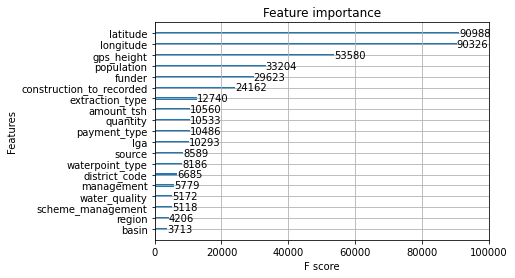

In [17]:
from xgboost import plot_importance


# plot feature importance
plt.figure(figsize=(20,8))
plot_importance(model)
plt.show()

In [ ]:
X = train[features]
y = TrainingSetLabels_df["status_group"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True, stratify=y)

!pip install catboost

from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
)

model.fit(X_train, y_train,eval_set=(X_val, y_val))

X_test = test[features]

predictions = model.predict(X_test)

predictions1=[]
for i in predictions:
  predictions1 += [i[0]]

output = pd.DataFrame({'id': X_test.index, 'status_group': predictions1})
output.to_csv('9/my_submission1.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = TrainingSetLabels_df["status_group"]
X = train[features]
X_test = test[features]


model = RandomForestClassifier(n_estimators=int(10000), max_depth=int(1000), random_state=int(1000))

model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'id': X_test.index, 'status_group': predictions})
output.to_csv('8/my_submission1.csv', index=False)